In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [166]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [2]:
import seaborn as sns

## 데이터셋 불러오기

In [3]:
data = pd.read_csv('./pima-indians-diabetes.csv')

In [4]:
data.head()

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_times_pregnant             768 non-null    int64  
 1   oral_glucose                 768 non-null    int64  
 2   blood_pressure               768 non-null    int64  
 3   Triceps_skin_fold_thickness  768 non-null    int64  
 4   serum_insulin                768 non-null    int64  
 5   Body_mass_index              768 non-null    float64
 6   Diabetes_pedigree_function   768 non-null    float64
 7   Age                          768 non-null    int64  
 8   target                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.columns

Index(['N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age', 'target'],
      dtype='object')

In [8]:
data['target'].value_counts()

0    500
1    268
Name: target, dtype: int64

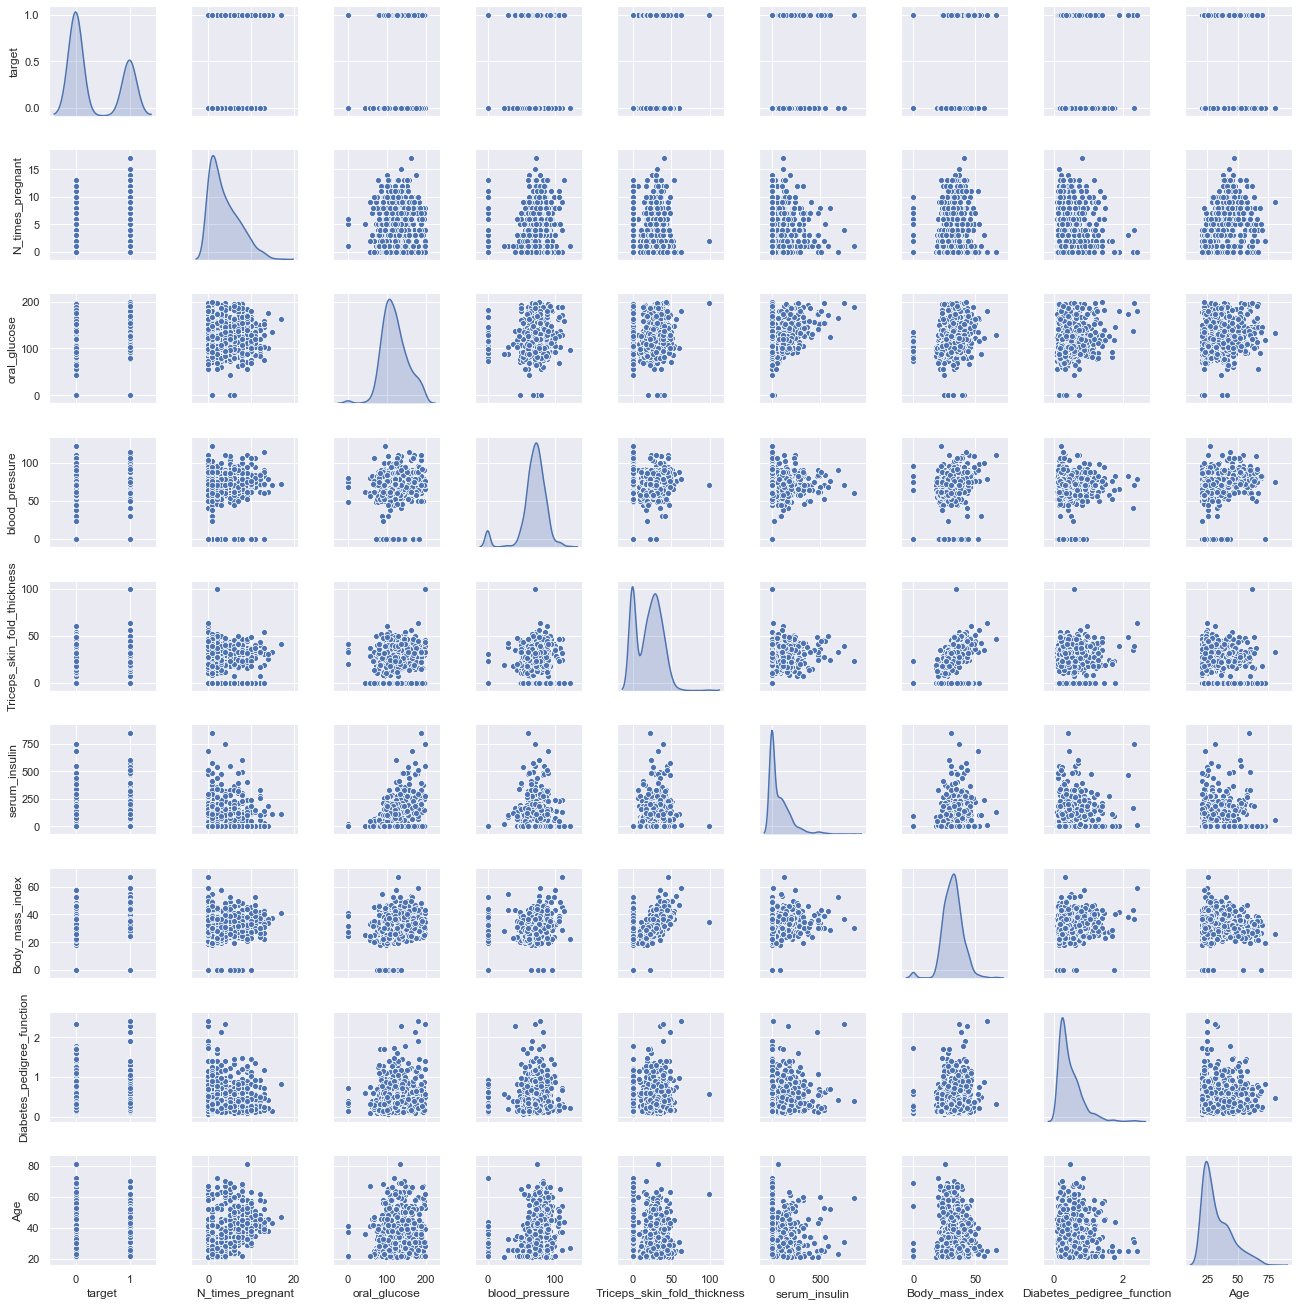

In [5]:
sns.set() 
columns = ['target','N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age'] 
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde') 
plt.show()

In [10]:
data.isnull().sum()

N_times_pregnant               0
oral_glucose                   0
blood_pressure                 0
Triceps_skin_fold_thickness    0
serum_insulin                  0
Body_mass_index                0
Diabetes_pedigree_function     0
Age                            0
target                         0
dtype: int64

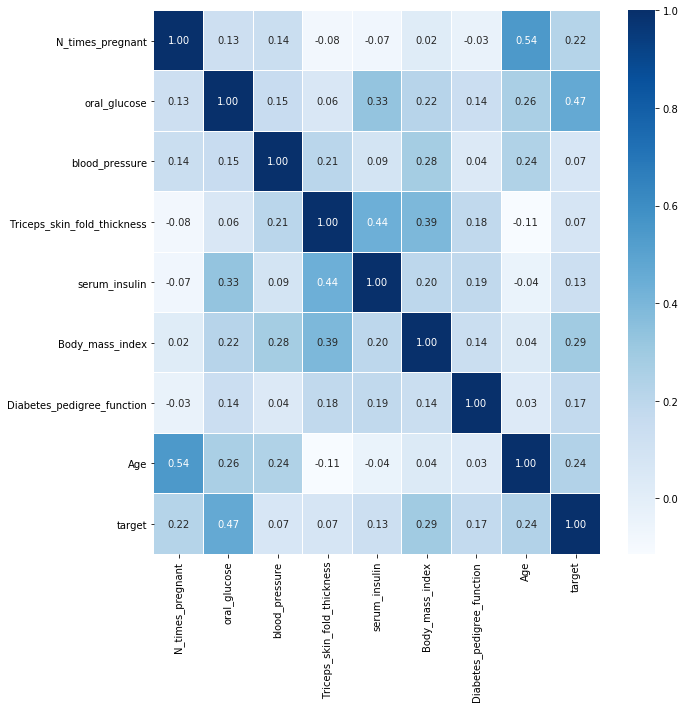

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.1, cmap='Blues')

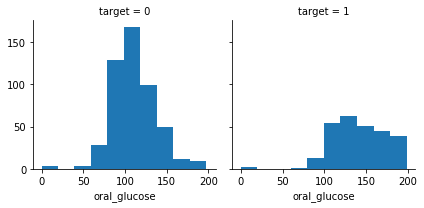

In [12]:
grid = sns.FacetGrid(data, col='target')
grid.map(plt.hist, 'oral_glucose', bins = 10)
plt.show()

In [13]:
!jt -r

Reset css and font defaults in:
C:\Users\fgtr1\.jupyter\custom &
C:\Users\fgtr1\AppData\Roaming\jupyter\nbextensions


In [13]:
feature_list = ['oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index']

In [14]:
zero_count = []
zero_percent = []
for col in feature_list:
    zero_num = data[data[col]==0].shape[0]
    zero_count.append(zero_num)
    #zero_percent.append(np.round(zero_num/data.shape[0]*100,2))

zero = pd.DataFrame([zero_count], columns=['혈당','혈압','피하지방','인슐린','체질량 지수'], index=['0값 갯수']).T
zero

,0값 갯수
혈당,5
혈압,35
피하지방,227
인슐린,374
체질량 지수,11


In [15]:
data.shape

(768, 9)

In [26]:
data['target'].value_counts()

0    500
1    268
Name: target, dtype: int64

In [27]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [99]:
font_path = r'C:\Users\fgtr1\Downloads\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf'

In [107]:
fontprop = fm.FontProperties(fname=font_path, size=12)

(0, 160)

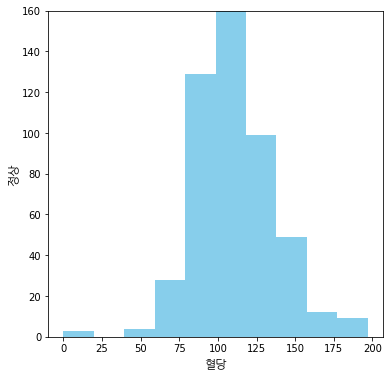

In [114]:
plt.figure(figsize=(6,6))
plt.hist(data[data['target'] == 0]["oral_glucose"], color='skyblue',bins=10)
plt.xlabel('혈당',fontproperties=fontprop)
plt.ylabel('정상',fontproperties=fontprop)
plt.ylim([0,160])

(0, 160)

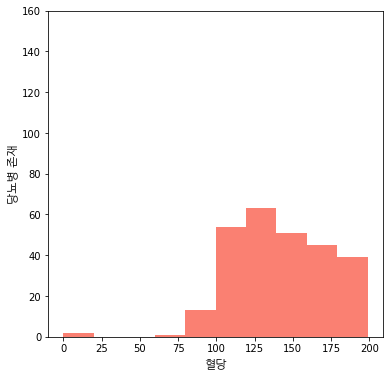

In [116]:
plt.figure(figsize=(6,6))
plt.hist(data[data['target'] == 1]["oral_glucose"], color='salmon',bins=10)
plt.xlabel('혈당',fontproperties=fontprop)
plt.ylabel('당뇨병 존재',fontproperties=fontprop)
#plt.ylabel('count')
plt.ylim([0,160])

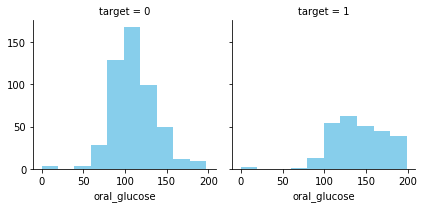

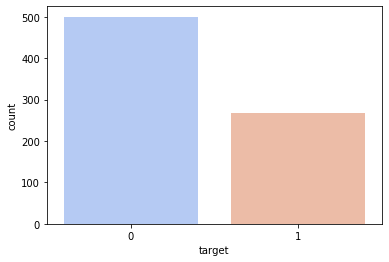

In [121]:
grid = sns.FacetGrid(data, col='target')
grid.map(plt.hist, 'oral_glucose', bins = 10, color='skyblue')

plt.show()

#labels = ['정상','당뇨병 존재']
outcome = sns.countplot(data['target'],palette='coolwarm')


In [28]:
data.head()

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# knn
- 혈당, 혈압, 체질량지수 0 인 데이터는 제거
- 피하지방, 인슐린은 나머지 수치형 데이터와 KNN
-  'feature similarity'를 이용해 가장 닮은(근접한) 데이터를 K개를 찾는 방식 (사이킷런의 imputer) 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer

In [18]:
knn_data = data.dropna(subset=["blood_pressure"])

In [19]:
knn_data = knn_data.dropna(subset=["Body_mass_index",'oral_glucose'])

In [20]:
knn_data[:10]

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1


In [21]:
imputer = KNNImputer(n_neighbors=5)

In [22]:
data_filled = imputer.fit_transform(knn_data)

In [207]:
knn = pd.DataFrame(data_filled)

In [208]:
knn

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
719,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
720,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
721,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
722,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [209]:
knn[8] = knn[8].astype('int64')

In [210]:
knn[0] = knn[0].astype('int64')

In [211]:
knn

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0
2,8,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
719,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
720,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
721,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
722,1,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1


In [212]:
knn = knn.rename({0:'N_times_pregnant',1:'oral_glucose', 2:'blood_pressure',3:'Triceps_skin_fold_thickness',4:'serum_insulin',5:'Body_mass_index',6:'Diabetes_pedigree_function',7:'Age',8:'target'},axis='columns')

In [213]:
knn

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0
2,8,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
719,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
720,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
721,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
722,1,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1


In [298]:
knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_times_pregnant             724 non-null    int64  
 1   oral_glucose                 724 non-null    float64
 2   blood_pressure               724 non-null    float64
 3   Triceps_skin_fold_thickness  724 non-null    float64
 4   serum_insulin                724 non-null    float64
 5   Body_mass_index              724 non-null    float64
 6   Diabetes_pedigree_function   724 non-null    float64
 7   Age                          724 non-null    float64
 8   target                       724 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 51.0 KB


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score
from sklearn import tree
import os

In [121]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(f'TN {confusion[0][0]}\t/ FP {confusion[0][1]}')
    print(f'FN {confusion[1][0]}\t/ TP {confusion[1][1]}')
    # ROC-AUC print 추가
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

## 1. 로지스틱 회귀 

In [1072]:
from sklearn.preprocessing import StandardScaler

X = knn.iloc[:, :-1]
y = knn.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

In [1073]:
# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
TN 87	/ FP 8
FN 26	/ TP 24
accuracy: 0.7655, precision: 0.7500, recall: 0.4800, F1: 0.5854, AUC:0.8577


In [123]:
from sklearn.metrics import confusion_matrix

In [ ]:
df['year'].value_counts()

In [127]:
y_test.value_counts()

0.0    95
1.0    50
Name: target, dtype: int64

In [1076]:
cfmat = confusion_matrix(y_test,pred)
print(cfmat)

[[87  8]
 [26 24]]


In [68]:
from sklearn.metrics import roc_curve
y_pred_proba = lr_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

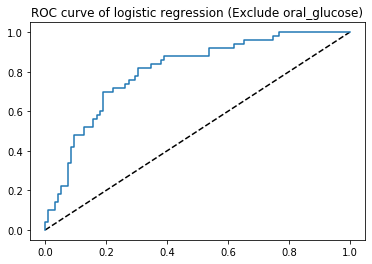

In [1074]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.title('ROC curve of logistic regression (Exclude oral_glucose)')
plt.show()

In [1075]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8029473684210525

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'max_depth':[1,2,3,4]}

In [86]:
depths = np.arange(1, 5)
num_leafs = [1, 5, 10, 15, 20]

In [95]:
param_grid = {'max_depth':depths}

In [96]:
gs = GridSearchCV(estimator=Tree_grid, param_grid=param_grid, cv=5)

In [111]:
grid_result = gs.fit(X_train, y_train)
#gs.score(X_test, y_test)

In [112]:
grid_result

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4])},
             pre_d

In [113]:
grid_result.best_score_

0.7426536731634183

In [114]:
grid_result.best_params_

{'max_depth': 1}

In [98]:
print('train score : {}'.format(gs.score(X_train, y_train)))
print("val score : {}".format(gs.score(X_test, y_test)))
predict_y = gs.predict(X_test)
print(predict_y)

train score : 0.8048359240069085
val score : 0.7172413793103448
[1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0.]


In [99]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [100]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [101]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

In [144]:
## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

In [104]:
col = ['N_times_pregnant',
 'oral_glucose',
 'blood_pressure',
 'Triceps_skin_fold_thickness',
 'serum_insulin',
 'Body_mass_index',
 'Diabetes_pedigree_function',
 'Age']

In [44]:
dTree = DecisionTreeClassifier(max_depth = 3, random_state=0).fit(X_train, y_train)


In [45]:
print('train score : {}'.format(dTree.score(X_train, y_train)))
print("val score : {}".format(dTree.score(X_test, y_test)))
predict_y = dTree.predict(X_test)
print(predict_y)


train score : 0.7823834196891192
val score : 0.7172413793103448
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dTree.predict(X_test)))
print('test score : {}'.format(dTree.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.95      0.81        95
         1.0       0.74      0.28      0.41        50

    accuracy                           0.72       145
   macro avg       0.73      0.61      0.61       145
weighted avg       0.72      0.72      0.67       145

test score : 0.7172413793103448


In [64]:
knn.columns

Index(['N_times_pregnant', 'oral_glucose', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'Body_mass_index',
       'Diabetes_pedigree_function', 'Age', 'target'],
      dtype='object')

In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train,y_train)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dTree.predict(X_test)))
print('test score : {}'.format(dTree.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.95      0.81        95
         1.0       0.74      0.28      0.41        50

    accuracy                           0.72       145
   macro avg       0.73      0.61      0.61       145
weighted avg       0.72      0.72      0.67       145

test score : 0.7172413793103448


In [50]:
tree_im = dTree.feature_importances_
rf_im = rf.feature_importances_

In [53]:
rf_im

array([0.0767258 , 0.21574572, 0.07916945, 0.0979971 , 0.14466448,
       0.14326185, 0.11810805, 0.12432754])

In [55]:
rf_im

array([0.0767258 , 0.21574572, 0.07916945, 0.0979971 , 0.14466448,
       0.14326185, 0.11810805, 0.12432754])

In [58]:
col = list(knn.columns)

In [59]:
tree_im = pd.Series(tree_im, col[:-1])
rf_im = pd.Series(rf_im, col[:-1])

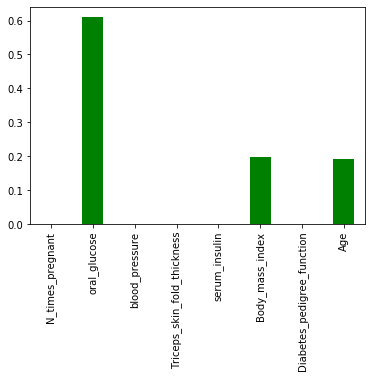

In [61]:
tree_im = pd.Series(tree_im, col[:-1])
tree_im.plot(kind='bar', color='g')

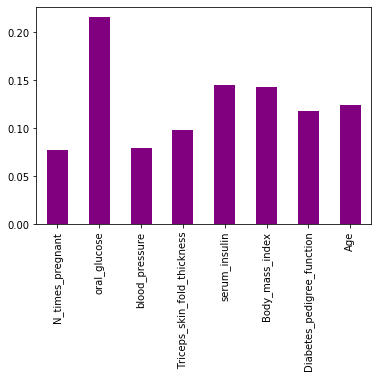

In [62]:
rf_im.plot(kind='bar', color='purple')

## 2. Gradient Boosting
- grid search로 파라미터 정함

In [1113]:
from sklearn.preprocessing import StandardScaler

X = knn.iloc[:, :-1]
y = knn.iloc[:, -1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

In [178]:
X_test.shape

(145, 8)

In [1114]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
    "max_depth":[2,3,4,5,6],
    "criterion": ["mse"],
    "n_estimators":[10,20,30,40,50,60,70,80,90,100]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)


0.9032815198618307
{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.77      0.86      0.82        95
           1       0.67      0.52      0.58        50

    accuracy                           0.74       145
   macro avg       0.72      0.69      0.70       145
weighted avg       0.74      0.74      0.74       145

ROC AUC score: 0.8256842105263158
Accuracy Score:  0.7448275862068966


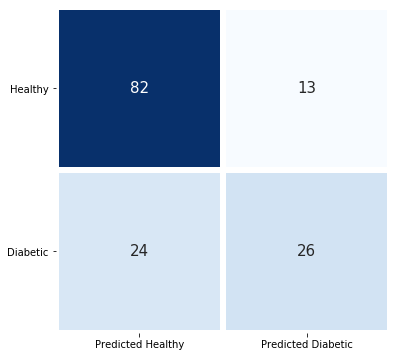

No handles with labels found to put in legend.


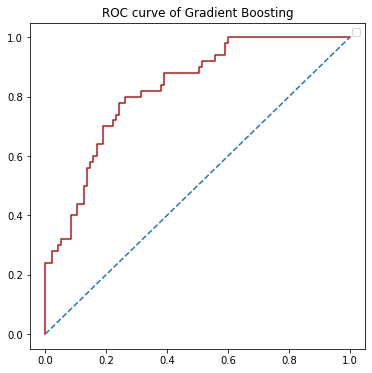

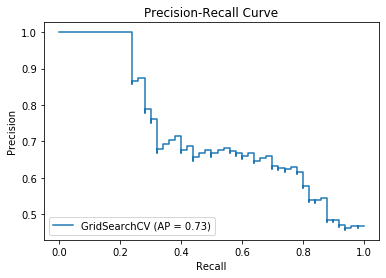

In [216]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717')

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title('ROC curve of Gradient Boosting')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [217]:
gdboost_im = clf.best_estimator_.feature_importances_

In [186]:
col

['N_times_pregnant',
 'oral_glucose',
 'blood_pressure',
 'Triceps_skin_fold_thickness',
 'serum_insulin',
 'Body_mass_index',
 'Diabetes_pedigree_function',
 'Age']

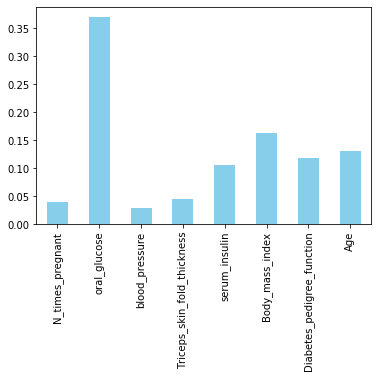

In [218]:
# 변수 중요도 
gdboost_im = pd.Series(gdboost_im, col)
gdboost_im.plot(kind='bar', color='skyblue')

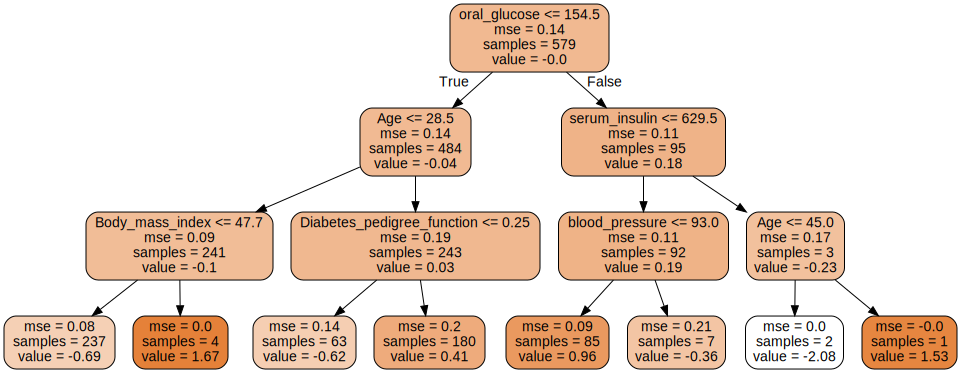

In [1117]:
# gradient boositing tree 일부 출력
estimator = clf.best_estimator_.estimators_[10][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

## 3. Decision tree
- 부트스트랩으로 30개 데이터셋 생성해서 30개의 decision tree 생성
- 각 decision tree에서 dominant rule 탐색 (coverage값 기준)

In [299]:
from sklearn.preprocessing import StandardScaler

X = knn.iloc[:, :-1]
y = knn.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [300]:
MAX_DEPTH = 1000
sample_ratio = 0.03
min_samples_leaf = round(sample_ratio * len(X_train))

train_idx, test_idx = X_train.index, X_test.index
train, test = knn.loc[train_idx,:], knn.loc[test_idx,:]

In [301]:
train = train.sort_index()
train

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0
2,8,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1
5,5,116.0,74.0,20.6,102.8,25.6,0.201,30.0,0
7,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
...,...,...,...,...,...,...,...,...,...
718,9,89.0,62.0,19.8,45.2,22.5,0.142,33.0,0
720,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
721,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
722,1,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1


In [302]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 723
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_times_pregnant             579 non-null    int64  
 1   oral_glucose                 579 non-null    float64
 2   blood_pressure               579 non-null    float64
 3   Triceps_skin_fold_thickness  579 non-null    float64
 4   serum_insulin                579 non-null    float64
 5   Body_mass_index              579 non-null    float64
 6   Diabetes_pedigree_function   579 non-null    float64
 7   Age                          579 non-null    float64
 8   target                       579 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 45.2 KB


In [303]:
uni_class = np.unique(knn['target'])

In [304]:
class_num = {}
for i in uni_class:
    class_num[i] = len(knn[knn['target'] == i])
    
class_num

{0: 475, 1: 249}

In [305]:
## 실제 train 데이터의 class별 개수

tra_uni_class = np.unique(train['target'])
tra_class_number = {}
for i in tra_uni_class:    
    tra_class_number[i] = len(train[train['target'] == i])
    
tra_class_number

{0: 392, 1: 187}

In [306]:
import os
os.chdir(r"C:\Education\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [235]:
os.getcwd()

'C:\\Education\\tree_gain_ratio\\modules'

In [236]:
# 기본 tool #
import pandas as pd
import numpy as np
from IPython.display import Image

In [307]:
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

In [308]:
CART_gini_ins = utr(min_samples_leaf, MAX_DEPTH, params ='gini',simplify=True)

In [309]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
gini_tree, gini_pprint_tree = CART_gini_ins.fit(train, target_attribute_name = "target")  

In [310]:
## CART_entropy_GR_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 - 성능측정용
## CART_entropy_GR_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_gini_tree, CART_gini_graph_tree = \
                CART_gini_ins.tree, CART_gini_ins.graph_tree     

In [312]:
!pip install graphviz

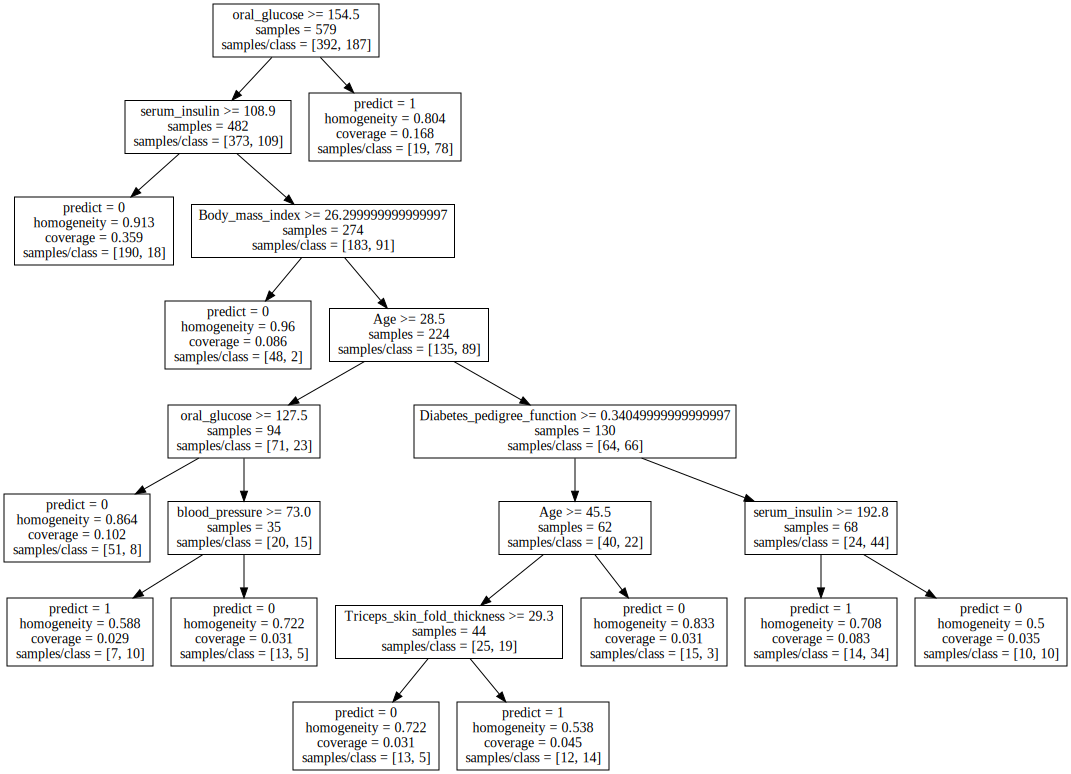

In [313]:
# 새 모델용 # entropy일때 
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph


# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [314]:
# PDF 파일 출력 #
graph_dir = 'graph'
split = 'gini'
d_set_name = 'pima'

tree_graph.render('{}/CART_{}_{}_test_1'.format(graph_dir, split,d_set_name))

'graph\\CART_gini_pima_test_1.pdf'

In [315]:
train_idx

Int64Index([584, 718, 433, 378, 110,  77, 429, 259,  23, 681,
            ...
             58, 476, 241, 214, 400, 563, 321, 206, 650,  92],
           dtype='int64', length=579)

In [316]:
# 성능측정 #
## train predict ##
train = data.loc[train_idx,:]

train_CART_gini_all_pred, train_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(test, CART_gini_tree)

In [320]:
train_CART_gini_all_pred_prob

,0,1
584,0.5,0.5
718,0.864407,0.135593
433,NaN,NaN
378,0.195876,0.804124
110,0.195876,0.804124
...,...,...
563,0.913462,0.0865385
321,NaN,NaN
206,0.195876,0.804124
650,0.913462,0.0865385


In [258]:
from usertree import userTree as utr
import utils

In [321]:
classes

array([0, 1], dtype=int64)

In [ ]:
erform_check(real, pred, prob, n_class, val_idx_dict, average = 'macro'):

In [328]:
real_v_num = np.array([CART_gini_ins.CLASS_DICT_[v] for v in train['target'].values.reshape(-1)])

In [329]:
real_v_num

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [327]:
CART_gini_ins.CLASS_DICT_

{0: 0, 1: 1}

In [399]:
X_ = knn.iloc[:,:-1]
y_ = knn.iloc[:,-1]

In [400]:
# 새 모델용 
target_att = 'target'
in_feature = list(knn.columns [knn.columns != target_att])

# DT termination criteria
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음

MAX_DEPTH = 1000
sample_ratio = 0.03
min_samples_leaf = round(sample_ratio * len(X_train))

# 만약 categorical data가 string 형태로 되어있는 column이라면 numeric으로 변환
## cate_col: column중에 categorical data 있는지 없는지 판단
cate_col = [col for col in in_feature if not np.issubdtype(X_[col].dtype, \
    np.number)]

# X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X_.loc[:,in_feature], columns=cate_col)
X_dummies

# y의 string 값을 numeric으로 변환 
y_, class_names = pd.factorize(knn[target_att])



In [1044]:
# train, test = 8:2, random split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_dummies, y_, test_size=0.2, random_state=290)

y_ = pd.DataFrame(y_, columns=['target'])
car_data_dum = pd.concat([X_dummies, y_], axis=1)

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train_.index, X_test_.index
train, test = car_data_dum.loc[train_idx,:], car_data_dum.loc[test_idx,:]

train

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
650,13,158.0,114.0,36.4,215.6,42.3,0.257,44.0,0
350,2,122.0,52.0,43.0,158.0,36.2,0.816,28.0,1
516,3,84.0,68.0,30.0,106.0,31.9,0.591,25.0,1
276,2,128.0,78.0,37.0,182.0,43.3,1.224,31.0,0
142,4,114.0,65.0,20.8,145.0,21.9,0.432,37.0,1
...,...,...,...,...,...,...,...,...,...
685,2,92.0,52.0,23.6,68.8,30.1,0.141,22.0,1
296,3,113.0,50.0,10.0,85.0,29.5,0.626,25.0,1
166,6,85.0,78.0,26.8,63.8,31.2,0.382,42.0,1
637,0,93.0,60.0,29.0,108.4,35.3,0.263,25.0,1


In [1045]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
## entropy_GR: entropy gain ratio

CART_entropy_ins = utr(min_samples_leaf, MAX_DEPTH, params ='entropy',simplify=True)

In [1046]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
entropy_tree, entropy_pprint_tree = CART_entropy_ins.fit(train, target_attribute_name = "target")  

In [1047]:
## CART_entropy_GR_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력
## CART_entropy_GR_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_entropy_tree, CART_entropy_graph_tree = \
                CART_entropy_ins.tree, CART_entropy_ins.graph_tree

In [1048]:
# 성능측정 #
train_CART_entropy_all_pred, train_CART_entropy_all_pred_prob \
                = CART_entropy_ins.predict(train, CART_entropy_tree)

test_CART_entropy_all_pred, test_CART_entropy_all_pred_prob \
    = CART_entropy_ins.predict(test, CART_entropy_tree)

In [1049]:
classes = np.unique(train['target'])

# list로 변환 #

train_CART_entropy_all_met = utils.perform_check(train['target'], \
         train_CART_entropy_all_pred, \
         train_CART_entropy_all_pred_prob,\
         len(classes), CART_entropy_ins.CLASS_DICT_)

test_CART_entropy_all_met = utils.perform_check(test['target'], \
         test_CART_entropy_all_pred, \
         test_CART_entropy_all_pred_prob, \
         len(classes), CART_entropy_ins.CLASS_DICT_)

In [1050]:
train_CART_entropy_all_met # [accuracy, recall, precision, f1, auc] 순

[0.8221070811744386,
 0.8756476683937824,
 0.8600508905852418,
 0.8677792041078306,
 0.8724865097049586]

In [1051]:
test_CART_entropy_all_met

[0.7517241379310344,
 0.8314606741573034,
 0.7789473684210526,
 0.8043478260869564,
 0.8249398073836276]

In [1052]:
print(f'train_accuracy: {train_CART_entropy_all_met[0].round(2)}')
print(f'test_accuracy: {test_CART_entropy_all_met[0].round(2)}')

train_accuracy: 0.82
test_accuracy: 0.75


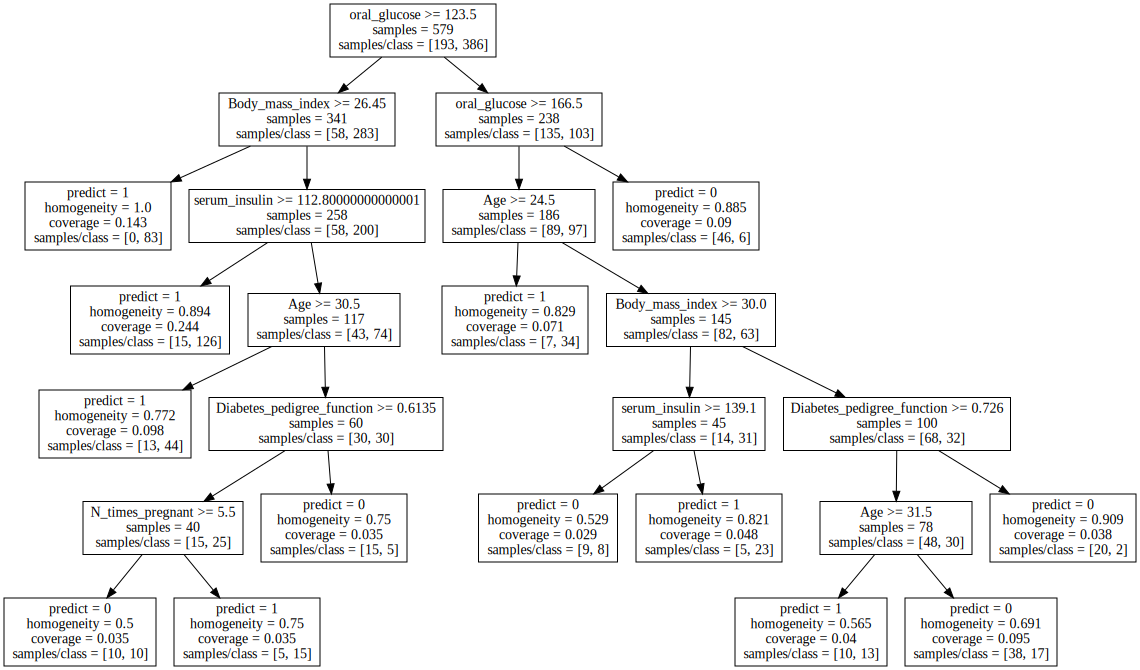

In [1053]:
# 새 모델용 # entropy_gain_ratio일때 # 왼쪽이 False, 오른쪽이 True
import graphviz
graph_dir = 'graph'
node, edge = CART_entropy_ins.graph.tree_to_graph(CART_entropy_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [1054]:
# PDF 파일 출력 #
graph_dir = 'graph'
d_set_name = 'pima'
tree_graph.render('{}/CART_entropy_{}_test_30'.format(graph_dir, d_set_name))

'graph\\CART_entropy_pima_test_30.pdf'

In [355]:
# 번외
from scipy.stats import entropy

print(f'entropy={entropy([4, 59, 0, 30], base=2)}')

entropy=1.1382700177682015


## 4. 랜덤 포레스트

In [1131]:
from sklearn.preprocessing import StandardScaler

X = knn.iloc[:, :-1]
y = knn.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

In [1132]:
parameters = {
    "max_features":[2,3,4,5,6],
    "criterion": ["entropy",'gini'],
    "n_estimators":[50,100,200,300,400]
    }

clf_rf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1)

clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_train, y_train))
print(clf_rf.best_params_)


1.0
{'criterion': 'entropy', 'max_features': 2, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.77      0.82      0.80        95
           1       0.61      0.54      0.57        50

    accuracy                           0.72       145
   macro avg       0.69      0.68      0.69       145
weighted avg       0.72      0.72      0.72       145

ROC AUC score: 0.8185263157894737
Accuracy Score:  0.7241379310344828


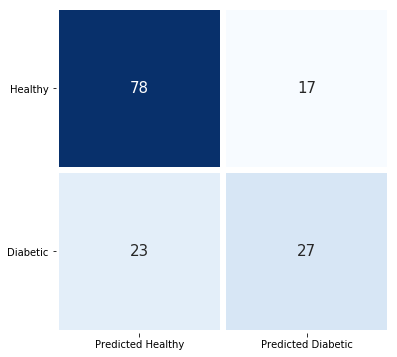

No handles with labels found to put in legend.
No handles with labels found to put in legend.


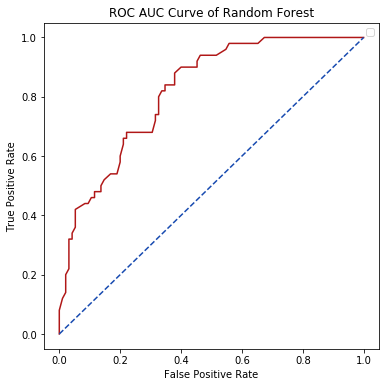

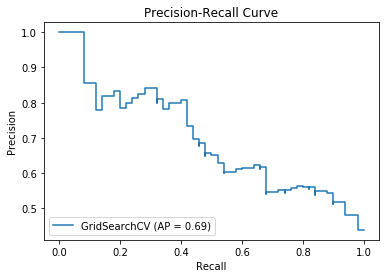

In [1062]:
y_pred = clf_rf.predict(X_test)
y_prob = clf_rf.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve of Random Forest')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf_rf, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [1064]:
rf_im = clf_rf.best_estimator_.feature_importances_

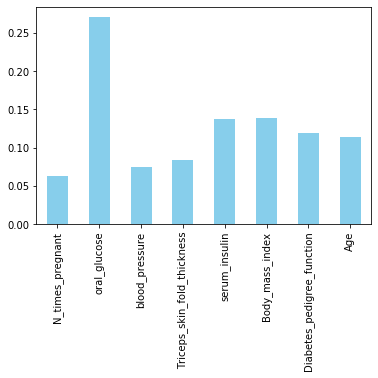

In [1065]:
rf_im = pd.Series(rf_im, col)
rf_im.plot(kind='bar', color='skyblue')

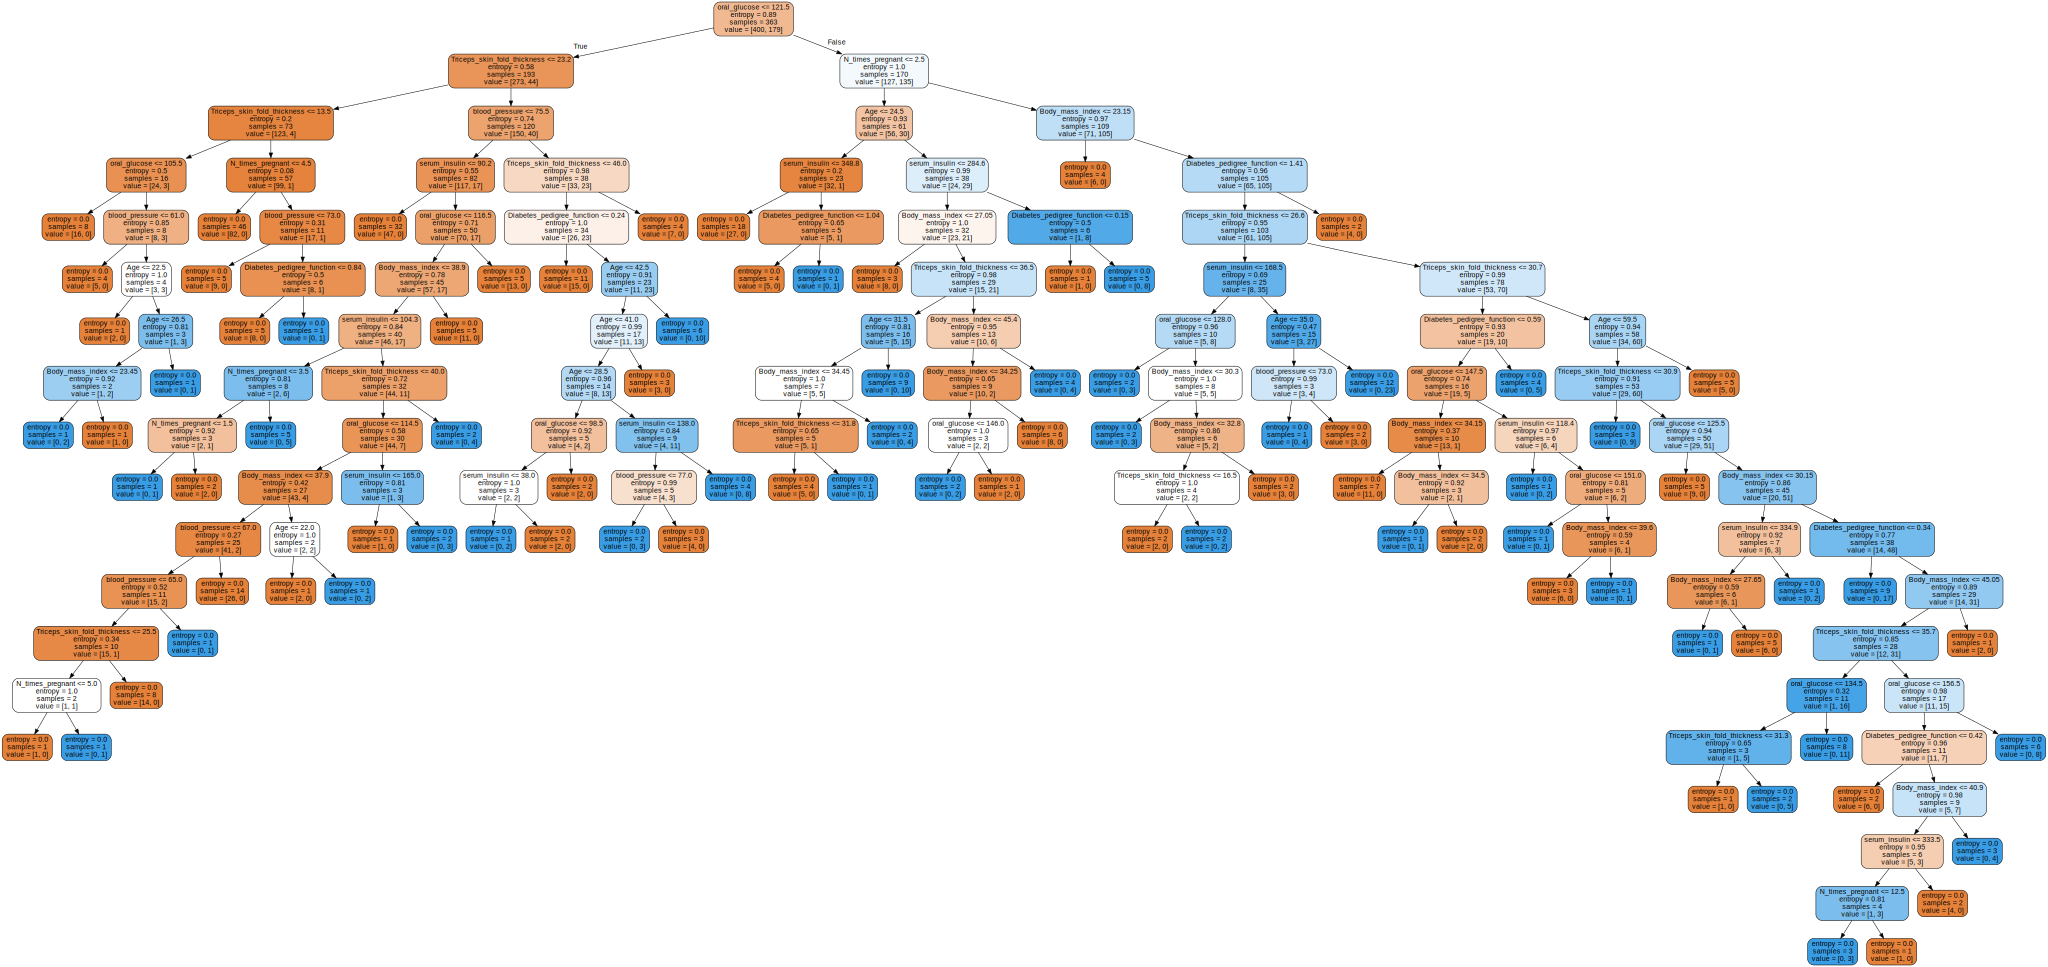

In [1137]:
estimator = clf_rf.best_estimator_.estimators_[34]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

# Step 2. '혈당 수치' 변수 제거 후 모델링

- EDA 결과 혈당 수치가 당뇨병에 미치는 영향이 큰 것으로 판단되어 혈당 수치를 제거한 뒤 모델링을 진행해서 차이점을 비교해보고자 함 

## 혈당 수치 삭제한 logistic Regression

In [132]:
knn_drop_glucose = knn.drop(['oral_glucose'], axis = 1).reset_index(drop=True)

In [133]:
knn_drop_glucose

,N_times_pregnant,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...
719,10.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
720,2.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
721,5.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
722,1.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [1077]:
from sklearn.preprocessing import StandardScaler

X = knn_drop_glucose.iloc[:, :-1]
y = knn_drop_glucose.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
TN 83	/ FP 12
FN 26	/ TP 24
accuracy: 0.7379, precision: 0.6667, recall: 0.4800, F1: 0.5581, AUC:0.8029


In [135]:
cfmat = confusion_matrix(y_test,pred)
print(cfmat)

[[83 12]
 [26 24]]


In [1078]:
from sklearn.metrics import roc_curve
y_pred_proba = lr_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

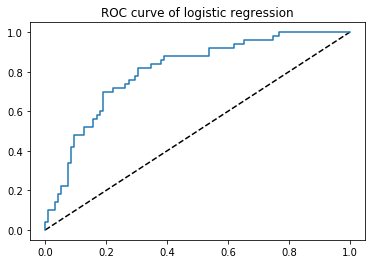

In [1079]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.title('ROC curve of logistic regression')
plt.show()

In [1080]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8029473684210525

## 혈당 수치 삭제한 Gradient Boosting 

In [1106]:
X = knn_drop_glucose.iloc[:, :-1]
y = knn_drop_glucose.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

In [1107]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
    "max_depth":[2,3,4,5,6],
    "criterion": ["mse"],
    "n_estimators":[10,20,30,40,50,60,70,80,90,100]
    }

clf2 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)

clf2.fit(X_train, y_train)
print(clf2.score(X_train, y_train))
print(clf2.best_params_)

0.842832469775475
{'criterion': 'mse', 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 60}


              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83        95
         1.0       0.71      0.50      0.59        50

    accuracy                           0.76       145
   macro avg       0.74      0.70      0.71       145
weighted avg       0.75      0.76      0.75       145

ROC AUC score: 0.8230526315789474
Accuracy Score:  0.7586206896551724


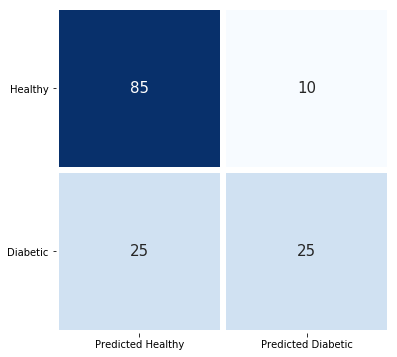

No handles with labels found to put in legend.


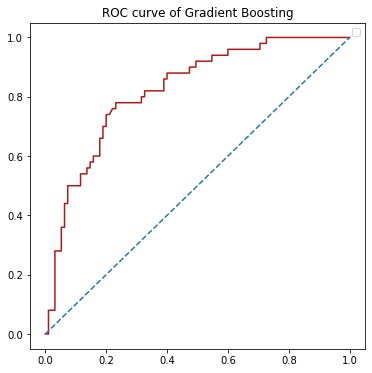

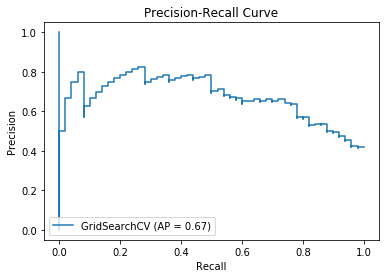

In [1108]:
y_pred = clf2.predict(X_test)
y_prob = clf2.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717')
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
#plt.axis('tight')
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
plt.title('ROC curve of Gradient Boosting')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf2, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [1103]:
gdboost_im2 = clf2.best_estimator_.feature_importances_

In [204]:
col2 = ['N_times_pregnant',
 'blood_pressure',
 'Triceps_skin_fold_thickness',
 'serum_insulin',
 'Body_mass_index',
 'Diabetes_pedigree_function',
 'Age']

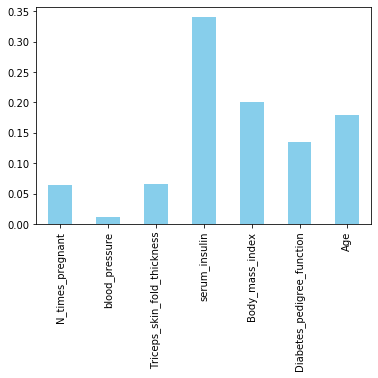

In [205]:
gdboost_im2 = pd.Series(gdboost_im2, col2)
gdboost_im2.plot(kind='bar', color='skyblue')

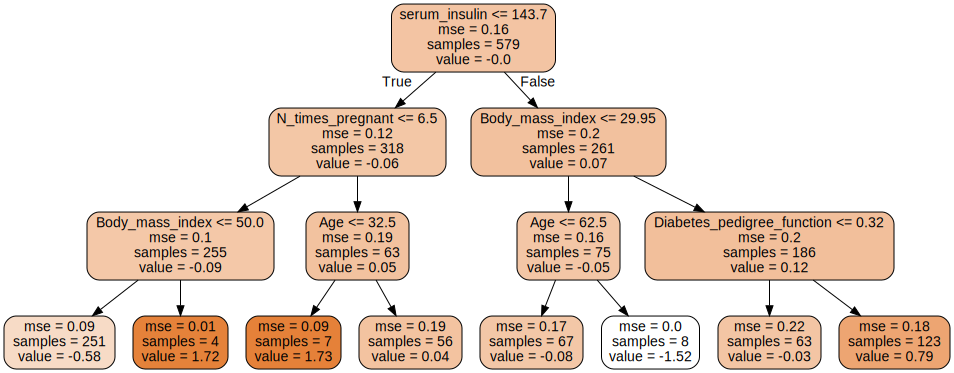

In [1112]:
estimator = clf2.best_estimator_.estimators_[20][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col2,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

## 혈당 수치 삭제한 Random Forest

In [1128]:
X = knn_drop_glucose.iloc[:, :-1]
y = knn_drop_glucose.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

In [1129]:
parameters = {
    "max_features":[2,3,4,5,6],
    "criterion": ["entropy",'gini'],
    "n_estimators":[50,100,200,300,400]
    }

clf_rf2 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1)

clf_rf2.fit(X_train, y_train)
print(clf_rf2.score(X_train, y_train))
print(clf_rf2.best_params_)


1.0
{'criterion': 'entropy', 'max_features': 3, 'n_estimators': 400}


              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79        95
         1.0       0.60      0.42      0.49        50

    accuracy                           0.70       145
   macro avg       0.67      0.64      0.64       145
weighted avg       0.69      0.70      0.69       145

ROC AUC score: 0.7747368421052631
Accuracy Score:  0.7034482758620689


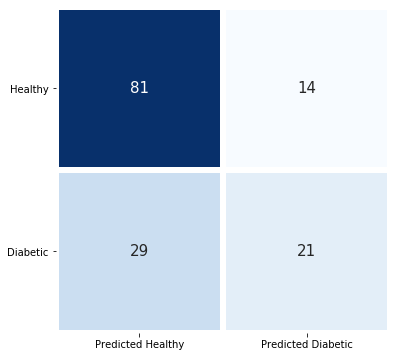

No handles with labels found to put in legend.


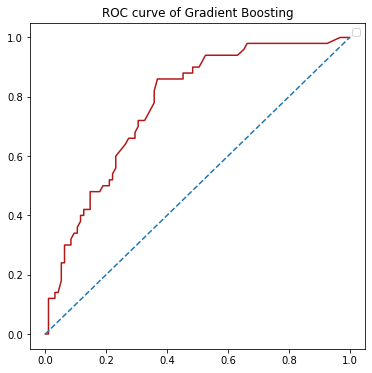

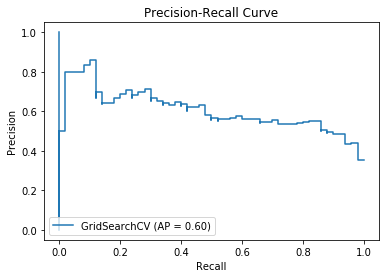

In [1069]:
y_pred = clf_rf2.predict(X_test)
y_prob = clf_rf2.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717')
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
#plt.axis('tight')
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
plt.title('ROC curve of Gradient Boosting')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf_rf2, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [1070]:
rf_im2 = clf_rf2.best_estimator_.feature_importances_

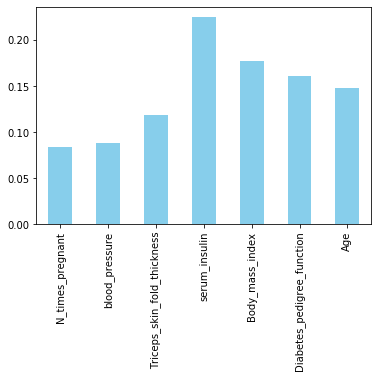

In [1071]:
rf_im2 = pd.Series(rf_im2, col2)
rf_im2.plot(kind='bar', color='skyblue')

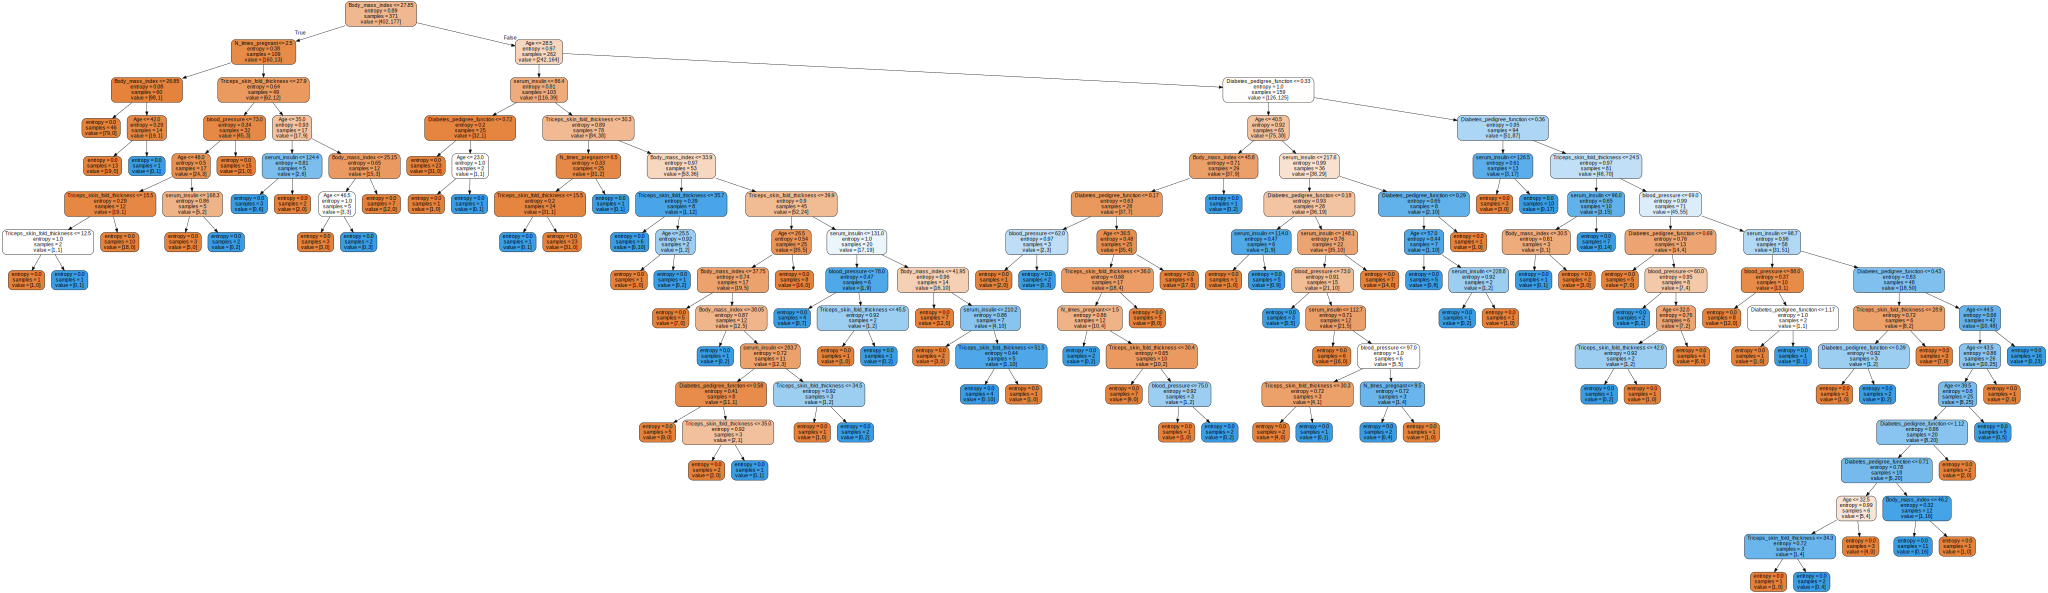

In [1130]:
estimator = clf_rf2.best_estimator_.estimators_[10]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col2,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

## Decision Tree

In [159]:
from sklearn.preprocessing import StandardScaler

X = knn.iloc[:, :-1]
y = knn.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42, stratify=y)

In [156]:
X_train

array([[-1.15043759, -0.28906435,  0.61427955, ..., -0.21311568,
         1.20220515, -1.05048488],
       [-1.15043759,  0.49196226, -2.61900577, ...,  1.54453693,
         5.46014571, -0.02983932],
       [ 0.03986868,  1.17536055,  0.45261529, ...,  0.06287936,
         0.98840474, -0.19994691],
       ...,
       [-0.25770788, -0.28906435, -1.81068444, ..., -0.4310065 ,
         0.45540935, -0.71026969],
       [ 0.33744525,  0.06890618,  0.12928675, ...,  0.22266596,
        -0.76716765,  0.39542967],
       [ 0.33744525,  0.55704781, -0.67903458, ..., -0.56174099,
        -0.19201443, -0.62521589]])

In [160]:
X_train

array([[-1.15043759, -0.28906435,  0.61427955, ..., -0.21311568,
         1.20220515, -1.05048488],
       [-1.15043759,  0.49196226, -2.61900577, ...,  1.54453693,
         5.46014571, -0.02983932],
       [ 0.03986868,  1.17536055,  0.45261529, ...,  0.06287936,
         0.98840474, -0.19994691],
       ...,
       [-0.25770788, -0.28906435, -1.81068444, ..., -0.4310065 ,
         0.45540935, -0.71026969],
       [ 0.33744525,  0.06890618,  0.12928675, ...,  0.22266596,
        -0.76716765,  0.39542967],
       [ 0.33744525,  0.55704781, -0.67903458, ..., -0.56174099,
        -0.19201443, -0.62521589]])

In [147]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 1000
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dtc =DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf) 

dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [148]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

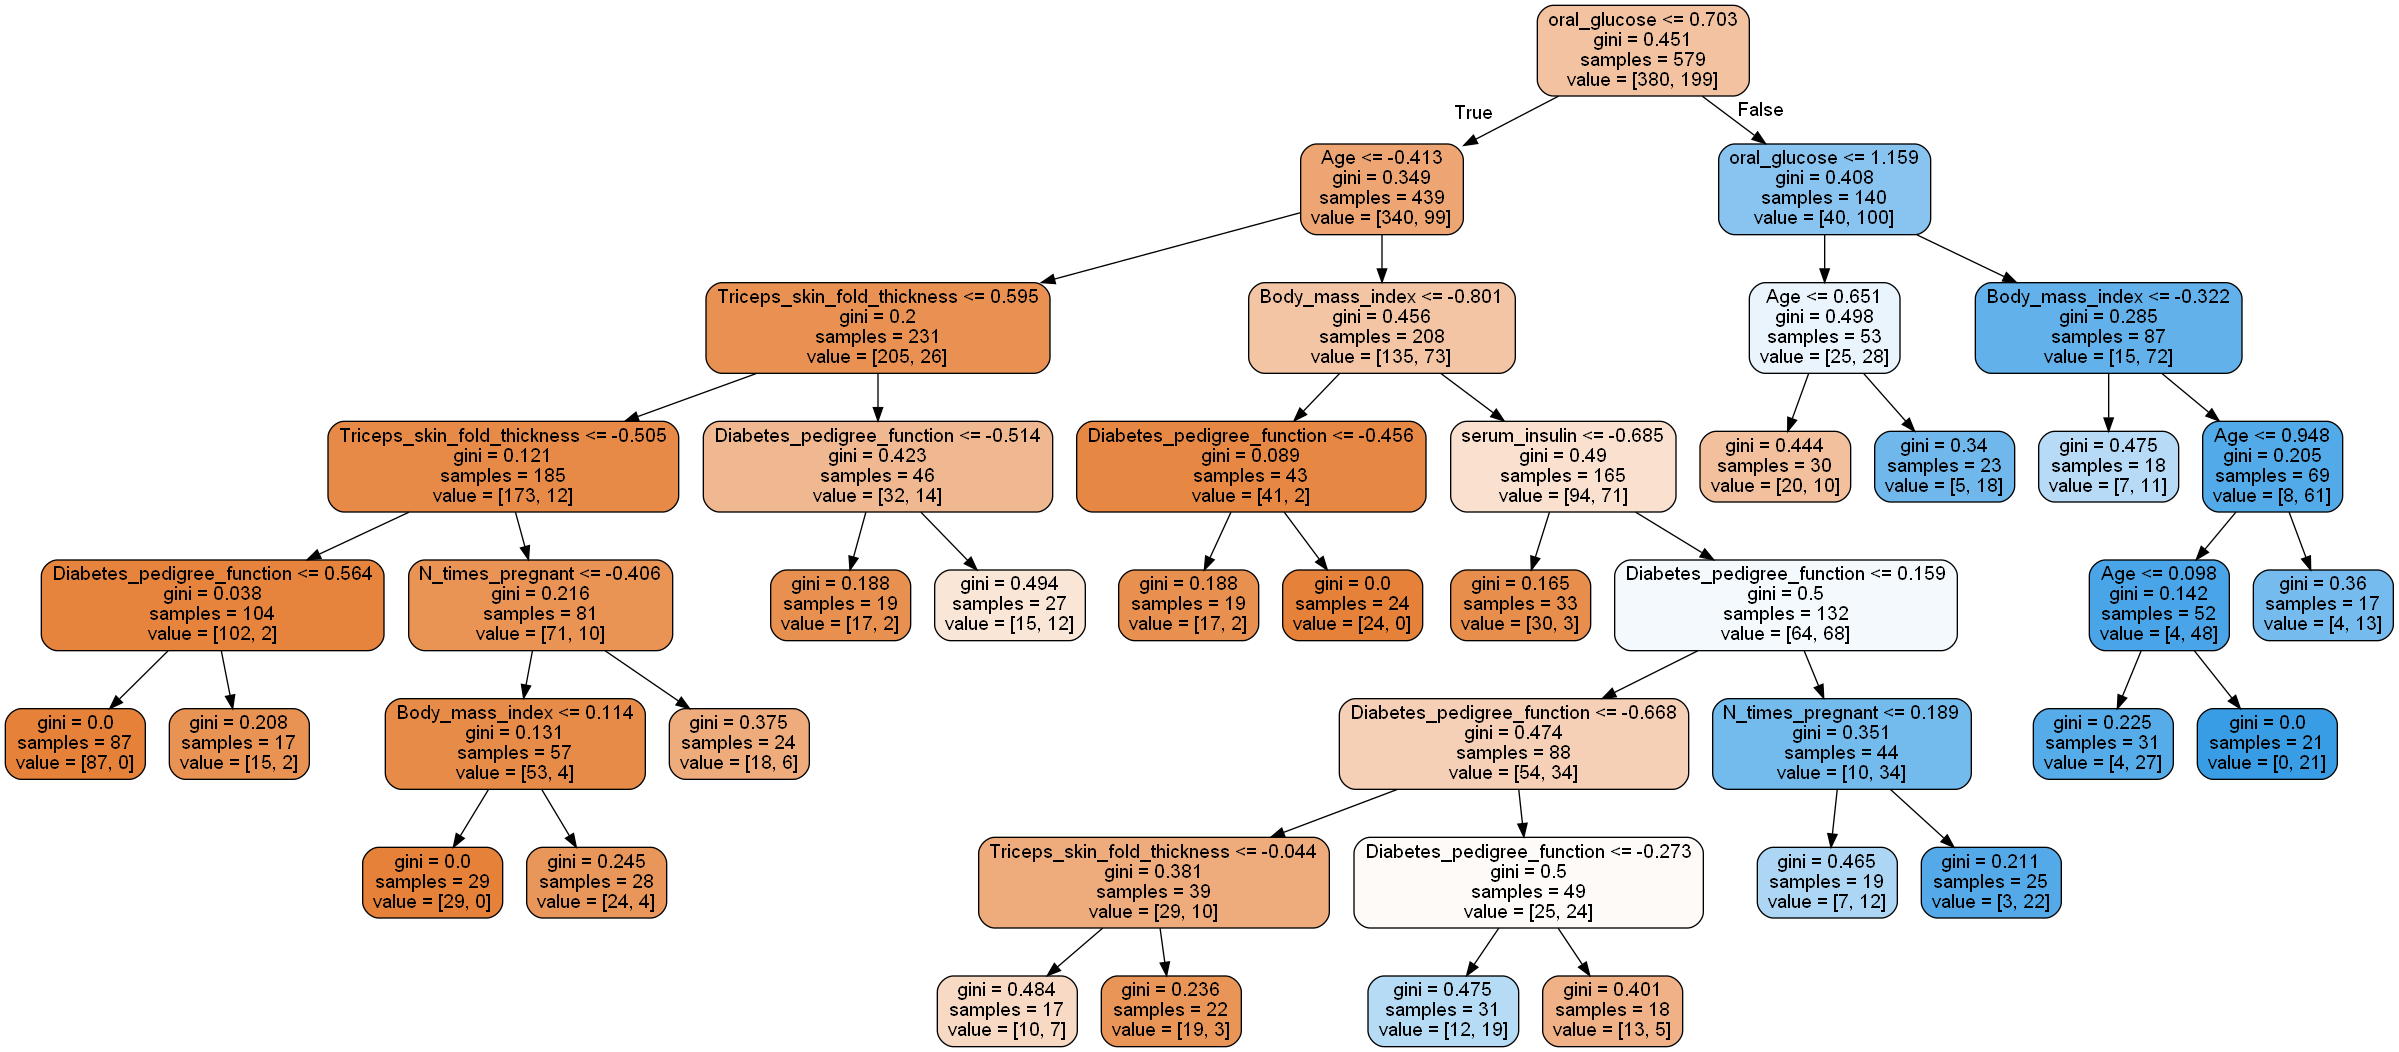

In [150]:
# 문자열 데이터를 저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(dtc, feature_names=col, out_file = dot_file, \
                     filled =True, rounded=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())